# 4.ライブラリによる分析実験(67.5/100)


# 4-2.pandas(7:17.5)

## 1 Pandasの概要

### pandasとは

SeriesとDataFrameというデータ型を提供するためのパッケージ

In [ ]:
import pandas as pd

### Seriesとは
1次元データ

In [ ]:
ser = pd.Series([10,20,30,40])
ser
# 全ての要素を整数で作成したので、自動的にdtype:int64が割り当てられてる

### DataFrameとは
2次元データ  
列毎にデータ型が統一されているなら、データの計算が容易に行える。  
複数種類のデータ型が混在している列は、データ型がObjectになる。  
Object型の列は計算できない。

In [ ]:
df = pd.DataFrame([[10,'a',True],
                   [20,'b',False],
                   [30,'c',False],
                   [40,'d',True]])
df

### DataFrameの概要を見る
Numpyのarange関数を使ってデータを作ってみるよ

In [ ]:
import numpy as np
df = pd.DataFrame(np.arange(100).reshape((25,4)))
df

In [ ]:
df.head() # 先頭5行を出力するよ

In [ ]:
df.tail() # 末尾5行を出力するよ

In [ ]:
df.shape # 列数、行数を出力するよ

### インデックス名、カラム名
わかりやすいインデックス名、カラム名をつけたいよね

In [ ]:
df = pd.DataFrame(np.arange(6).reshape((3,2)))
df

In [ ]:
df.index = ['01','02','03']
df.columns = ['A','B']
df

In [ ]:
named_df = pd.DataFrame(np.arange(6).reshape((3,2)),
                        columns=['A列','B列'],
                        index = ['1行目','2行目','3行目'])
named_df

### データの抽出
データを投句って、データを抽出してみる。

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.arange(12).reshape((4,3)),
                  columns = ['A','B','C'],
                  index = ['1行目','2行目','3行目','4行目'])
df

In [ ]:
df['A'] # 列で抽出

In [ ]:
df[['A','C']] # リストで複数列抽出

In [ ]:
df[:2] # 2行目まで抽出

In [ ]:
df.loc[:,:] # locメソッドで全行全列抽出

In [ ]:
df.loc[:,'A'] # locメソッドで全行A列抽出

In [ ]:
df.loc[:,['A','B']] # locメソッドで全行A列B列抽出

In [ ]:
df.loc['1行目',:] # 1行目の全て抽出

In [ ]:
df.loc[['1行目','3行目'],:] # 1行目、3行目の全て抽出

In [ ]:
df.loc[['1行目'],['A','C']] # 1行目のA、C列を抽出

In [ ]:
df.iloc[1,1] # 数字で抽出（この場合、2行目のB列）

In [ ]:
df.iloc[1:,1]

In [ ]:
df.iloc[1:,:2]

## 2. データの読み込み・書き込み

### データ読み込み：CSVファイル

In [ ]:
import pandas as pd
df = pd.read_csv('data/201704health.csv', encoding='utf-8')
df

### データ読み込み：Excelファイル

In [ ]:
df = pd.read_excel('data/201704health.xlsx')
df

### データ読み込み：WebサイトのHTMLから表を取得

In [ ]:
url = 'https://ja.wikipedia.org/wiki/%E3%83%88%E3%83%83%E3%83%97%E3%83%AC%E3%83%99%E3%83%AB%E3%83%89%E3%83%A1%E3%82%A4%E3%83%B3%E4%B8%80%E8%A6%A7'
tables = pd.read_html(url)

In [ ]:
len(tables)

In [ ]:
df = tables[4]
df

### データ書き込み：CSVファイル

In [ ]:
df.to_csv('data/write_data.csv')

### データ書き込み：Excelファイル

In [ ]:
df.to_excel('data/write_data.xlsx')

### データの再利用

In [ ]:
df.to_pickle('data/write_df.pickle')

In [ ]:
df = pd.read_pickle('data/write_df.pickle')

## 3.データの整形

In [ ]:
import pandas as pd
import numpy as np

### 使用するデータの読み込み

In [ ]:
df = pd.read_excel('data/201704health.xlsx')
df

### 条件で抽出

In [ ]:
df['歩数'] >= 10000

In [ ]:
df_selected = df[df['歩数'] >= 10000]
df_selected

In [ ]:
df_selected.shape

In [ ]:
df.query('歩数 >= 10000 and 摂取カロリー <= 1800')

### データ型変換

In [ ]:
df.dtypes

In [ ]:
df.loc[:, 'date'] = df.loc[:,'日付'].apply(pd.to_datetime)

In [ ]:
df.loc[:,'date']

In [ ]:
df

In [ ]:
df.loc[:,'摂取カロリー'] = df.loc[:,'摂取カロリー'].astype(np.float32)

In [ ]:
df = df.set_index('date')

In [ ]:
df.head()

### 並べ替え

In [ ]:
df.sort_values(by='歩数')

In [ ]:
df.sort_values(by='歩数', ascending=False).head()

### 不要なカラムの削除

In [ ]:
df = df.drop('日付',axis=1)

In [ ]:
df.tail()

### 組合わせデータの挿入

In [ ]:
df.loc[:,'歩数/カロリー'] = df.loc[:,'歩数'] / df.loc[:,'摂取カロリー']
df

In [ ]:
def exercise_judge(ex):
    if ex <= 3.0:
        return 'Low'
    elif 3.0 < ex <= 6.0:
        return 'Mid'
    else:
        return 'High'

In [ ]:
df.loc[:,'運動指数'] = df.loc[:,'歩数/カロリー'].apply(exercise_judge)
df

In [ ]:
df.to_pickle('data/df_201704health.pickle')

In [ ]:
df_moved = pd.get_dummies(df.loc[:,'運動指数'], prefix='運動')
df_moved

In [ ]:
df_moved.to_pickle('data/df_201704moved.pickle')

## 4.時系列データ

### 1ヶ月分のデータを作る

In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range(start='2017-04-01', end='2017-04-30')
dates

In [ ]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(1,31,30),index = dates, columns = ['乱数'])
df

### 1年分365日のデータを作る

In [ ]:
dates = pd.date_range(start='2017-01-01', periods=365)
dates

In [ ]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(1,31,365), index=dates, columns=['乱数'])
df

### 月平均のデータにする

In [ ]:
df.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
df.loc[:, '乱数'].resample('M').mean()

### 複雑な条件のインデックス

In [ ]:
pd.date_range(start='2017-01-01', end='2018-12-31',freq='W-SAT')

In [ ]:
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SAT')).sum(),columns=['乱数'])
df_year

## 5.欠損値処理

In [ ]:
df_201705 = pd.read_csv('data/201705health.csv',encoding='utf-8',index_col = '日付',parse_dates=True)
df_201705

In [ ]:
df_201705_drop = df_201705.dropna()
df_201705_drop

In [ ]:
df_201705_fillna = df_201705.fillna(0)
df_201705_fillna

In [ ]:
df_201705_fill = df_201705.fillna(method='ffill')
df_201705_fill

In [ ]:
df_201705_fillmean = df_201705.fillna(df_201705.mean())
df_201705_fillmean

In [ ]:
df_201705_fillmedian = df_201705.fillna(df_201705.median())
df_201705_fillmedian

In [ ]:
df_201705_fillmode = df_201705.fillna(df_201705.mode().iloc[0,:])
df_201705_fillmode

## 6.データ連結

### 保存したデータを読み込み

In [ ]:
df = pd.read_pickle('data/df_201704health.pickle')
df

In [ ]:
df_moved = pd.read_pickle('data/df_201704moved.pickle')
df_moved

### 列方向のデータ連結

In [ ]:
df_merged = pd.concat([df, df_moved],axis=1)
df_merged

### 行方向のデータ連結

In [ ]:
df_merged_0405 = pd.concat([df_merged, df_201705_fill],axis=0,sort=True)
df_merged_0405

## 7.統計データの扱い

### 保存したデータの読み込み

In [6]:
import pandas as pd
df = pd.read_pickle('data/df_201704health.pickle')
df.head()

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,9434,1930.0,4.888083,Mid


### 基本統計量

In [7]:
df.loc[:,'摂取カロリー'].max()

2500.0

In [8]:
df.loc[:,'摂取カロリー'].min()

1800.0

In [9]:
df.loc[:,'摂取カロリー'].mode()

0    2300.0
dtype: float32

In [10]:
df.loc[:,'摂取カロリー'].mean()

2026.6666259765625

In [11]:
df.loc[:,'摂取カロリー'].median()

1945.0

In [12]:
df.loc[:,'摂取カロリー'].std()

205.5494384765625

In [13]:
df.loc[:,'摂取カロリー'].std(ddof=0)

202.09457397460938

In [14]:
df[df.loc[:, '摂取カロリー']==2300].count()

歩数         8
摂取カロリー     8
歩数/カロリー    8
運動指数       8
dtype: int64

### 要約

In [15]:
df.describe()

,歩数,摂取カロリー,歩数/カロリー
count,30.000000,30.000000,30.000000
mean,7766.366667,2026.666626,3.929658
std,2689.269308,205.549438,1.563674
min,2510.000000,1800.000000,1.091304
25%,6661.500000,1870.000000,2.921522
50%,7561.000000,1945.000000,4.030762
75%,8408.500000,2300.000000,4.421622
max,15328.000000,2500.000000,8.515556


### 相関係数

In [16]:
df.corr()

,歩数,摂取カロリー,歩数/カロリー
歩数,1.000000,-0.498703,0.982828
摂取カロリー,-0.498703,1.000000,-0.636438
歩数/カロリー,0.982828,-0.636438,1.000000


### 散布図行列

In [19]:
# !pip install japanize-matplotlib

In [17]:
%matplotlib inline
import japanize_matplotlib
from pandas.plotting import scatter_matrix

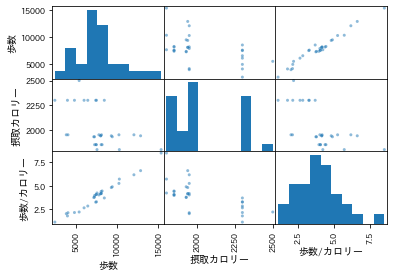

In [18]:
_ = scatter_matrix(df)

### データ変換

In [20]:
df.loc[:,['歩数','摂取カロリー']]

,歩数,摂取カロリー
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0
2017-04-06,7593,1800.0
2017-04-07,9320,1940.0
2017-04-08,4873,2300.0
2017-04-09,12045,1950.0


In [21]:
df.loc[:,['歩数','摂取カロリー']].values

array([[ 5439.,  2500.],
       [ 2510.,  2300.],
       [10238.,  1950.],
       [ 8209.,  1850.],
       [ 9434.,  1930.],
       [ 7593.,  1800.],
       [ 9320.,  1940.],
       [ 4873.,  2300.],
       [12045.,  1950.],
       [ 7493.,  1850.],
       [ 7289.,  1930.],
       [ 6481.,  2300.],
       [10287.,  1800.],
       [ 8043.,  1940.],
       [ 7435.,  2300.],
       [ 7529.,  2300.],
       [ 8031.,  1940.],
       [ 8475.,  2300.],
       [ 8132.,  1950.],
       [15328.,  1800.],
       [12849.,  1940.],
       [ 4029.,  2300.],
       [ 3890.,  1950.],
       [ 8093.,  1850.],
       [ 7823.,  1950.],
       [ 7492.,  1850.],
       [ 7203.,  1930.],
       [ 7302.,  1850.],
       [ 6033.,  2300.],
       [ 4093.,  1950.]])